<a id="TOP"> </a>
<div class="alert alert-box alert-info">
</div>

***

# EXPLORE

In [12]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Latex

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wrangle import clean_zillow, summarize, split_data_continuous
from viz import get_viz

import warnings
warnings.filterwarnings("ignore")

In [2]:
get_viz()


from viz import boxplots, hists, heatmaps, slicer, haversine
        


In [3]:
from viz import boxplots, hists, heatmaps, slicer, haversine

In [4]:
df = clean_zillow()

df.info()

Number of observations removed: 9964
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    41067 non-null  int64         
 1   parcel                41067 non-null  int64         
 2   logerror              41067 non-null  float64       
 3   trans_date            41067 non-null  datetime64[ns]
 4   bathrooms             41067 non-null  object        
 5   bedrooms              41067 non-null  object        
 6   tot_sqft              41067 non-null  float64       
 7   fips                  41067 non-null  object        
 8   hot_tub               41067 non-null  float64       
 9   lat                   41067 non-null  float64       
 10  lon                   41067 non-null  float64       
 11  lot_sqft              41067 non-null  float64       
 12  pools                 41067 non-null 

In [5]:
df.land_tax_value.dtype

dtype('float64')

In [6]:
num_vars = []
for i in df:
    if df[i].dtype != 'O':
        num_vars.append(i)
num_vars

['id',
 'parcel',
 'logerror',
 'trans_date',
 'tot_sqft',
 'hot_tub',
 'lat',
 'lon',
 'lot_sqft',
 'pools',
 'raw_tract_and_block',
 'building_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'tax_delinquency_flag',
 'tract_and_block',
 'half_baths',
 'house_age']

In [7]:
cat_vars = []
for i in df:
    if i not in num_vars:
        cat_vars.append(i)
cat_vars.append('trans_date')

In [8]:
cat_vars

['bathrooms',
 'bedrooms',
 'fips',
 'county_landuse',
 'city_id',
 'zip_code',
 'trans_date']

In [9]:
num_vars.remove('trans_date')

In [10]:
df[num_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    41067 non-null  int64  
 1   parcel                41067 non-null  int64  
 2   logerror              41067 non-null  float64
 3   tot_sqft              41067 non-null  float64
 4   hot_tub               41067 non-null  float64
 5   lat                   41067 non-null  float64
 6   lon                   41067 non-null  float64
 7   lot_sqft              41067 non-null  float64
 8   pools                 41067 non-null  int64  
 9   raw_tract_and_block   41067 non-null  float64
 10  building_tax_value    41067 non-null  float64
 11  tax_value             41067 non-null  float64
 12  land_tax_value        41067 non-null  float64
 13  tax_amount            41067 non-null  float64
 14  tax_delinquency_flag  41067 non-null  int64  
 15  tract_and_block    

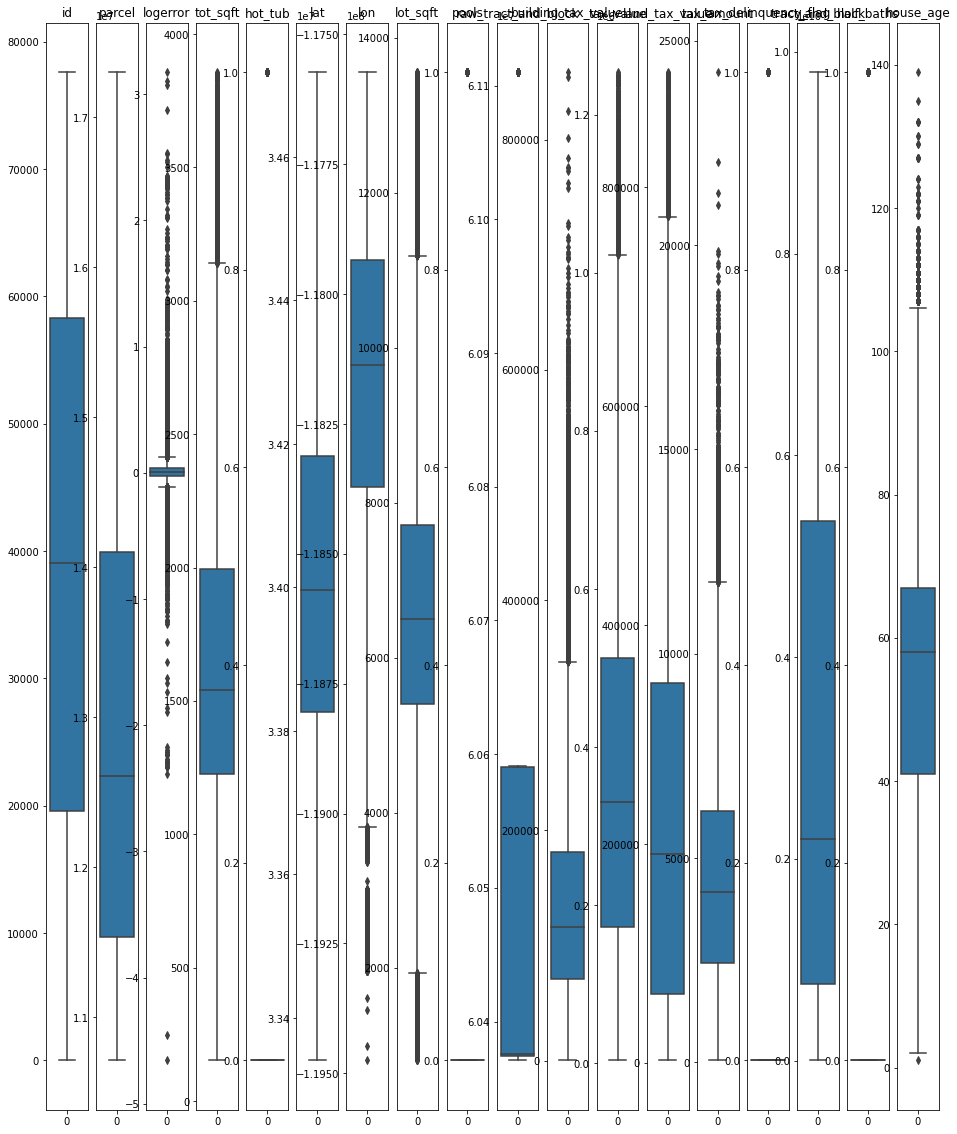

In [11]:
boxplots(df[num_vars])

In [13]:
train, validate, test = split_data_continuous(df)

Prepared df: (41067, 25)

Train: (24639, 25)
Validate: (8214, 25)
Test: (8214, 25)


In [61]:
train['sle']= train.logerror**2

In [62]:
train['rsle']= train.sle**.5

In [71]:
train['le']= train.logerror

In [129]:
le_per_city = train[['le', 'sle', 'rsle', 'city_id']].groupby('city_id').agg(
['min', 'max', 'median', 'std', 'mean']).reset_index()

In [72]:
# le_per_city = train[['le', 'city_id']].groupby('city_id').agg(
# ['min', 'max', 'median', 'std', 'mean']).reset_index()

# sle_per_city = train[['sle', 'city_id']].groupby('city_id').agg(
# ['min', 'max', 'median', 'std', 'mean']).reset_index()

# rsle_per_city = train[['rsle', 'city_id']].groupby('city_id').agg(
# ['min', 'max', 'median', 'std', 'mean']).reset_index()

In [130]:
le_per_city.columns = ['_'.join(column) for column in le_per_city.columns.to_flat_index()]

In [131]:
le_per_city.columns

Index(['city_id_', 'le_min', 'le_max', 'le_median', 'le_std', 'le_mean',
       'sle_min', 'sle_max', 'sle_median', 'sle_std', 'sle_mean', 'rsle_min',
       'rsle_max', 'rsle_median', 'rsle_std', 'rsle_mean'],
      dtype='object')

In [132]:
le_per_city.columns = ['city_id', 'le_min', 'le_max', 'le_median', 'le_std', 'le_mean',
       'sle_min', 'sle_max', 'sle_median', 'sle_std', 'sle_mean', 'rsle_min',
       'rsle_max', 'rsle_median', 'rsle_std', 'rsle_mean']

In [80]:
# le_per_city.columns = ['city_id', 'le_min', 'le_max', 'le_median', 'le_std', 'le_mean']

# sle_per_city.columns = ['_'.join(column) for column in sle_per_city.columns.to_flat_index()]

# sle_per_city.columns

# sle_per_city.columns = ['city_id_', 'sle_min', 'sle_max', 'sle_median', 'sle_std', 'sle_mean']

# rsle_per_city.columns = ['_'.join(column) for column in rsle_per_city.columns.to_flat_index()]

# rsle_per_city.columns

# rsle_per_city.columns = ['city_id', 'rsle_min', 'rsle_max', 'rsle_median', 'rsle_std', 'rsle_mean']

In [133]:
le_per_city

,city_id,le_min,le_max,le_median,le_std,le_mean,sle_min,sle_max,sle_median,sle_std,sle_mean,rsle_min,rsle_max,rsle_median,rsle_std,rsle_mean
0,10241,-0.143684,0.409479,0.011274,0.092781,0.036141,4.096753e-07,0.167673,0.000912,0.027802,0.009816,0.000640,0.409479,0.030195,0.078793,0.060651
1,10389,-0.289564,0.185907,-0.053653,0.129784,-0.054199,2.571994e-04,0.083847,0.008679,0.025054,0.018578,0.016037,0.289564,0.093018,0.082645,0.110616
2,10608,-2.300184,2.318126,-0.000125,0.311870,0.033417,1.570206e-08,5.373706,0.000814,0.625122,0.097935,0.000125,2.318126,0.028525,0.299955,0.091506
3,10723,-0.272320,0.432247,-0.003246,0.093069,0.007334,8.588302e-07,0.186838,0.001016,0.022891,0.008646,0.000927,0.432247,0.031866,0.071279,0.060050
4,10734,-0.062123,0.610729,0.009675,0.062706,0.015262,4.685839e-08,0.372990,0.000252,0.035353,0.004129,0.000216,0.610729,0.015872,0.058644,0.026858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,56780,-0.087881,0.095431,0.037789,0.058781,0.027102,8.477498e-08,0.009107,0.001660,0.003547,0.003696,0.000291,0.095431,0.040738,0.033492,0.052295
162,6021,-0.167958,0.960386,-0.003450,0.134920,0.012259,2.088024e-07,0.922341,0.001365,0.102493,0.018132,0.000457,0.960386,0.036945,0.116726,0.068359
163,6395,-0.067120,1.003781,0.011441,0.180587,0.039175,6.305236e-07,1.007576,0.000695,0.175077,0.033158,0.000794,1.003781,0.026367,0.172688,0.065120
164,8384,-2.283001,2.313247,0.004115,0.263772,0.012904,1.276021e-07,5.351113,0.000461,0.569973,0.069335,0.000357,2.313247,0.021475,0.254250,0.071207


In [134]:
# fips_per_zip = df[['zip_code', 'fips']].groupby('zip_code').agg('count')
train['city_id_count'] = 1
city_county = train[['city_id', 'fips', 'city_id_count']]\
.groupby('city_id').agg({'fips':'first', 'city_id_count': 'count'})
city_county = city_county.reset_index()

city_county.columns = ['city_id_check', 'county', 'house_count']
city_county

,city_id_check,county,house_count
0,10241,Los Angeles County,87
1,10389,Los Angeles County,14
2,10608,Orange County,219
3,10723,Los Angeles County,124
4,10734,Los Angeles County,111
...,...,...,...
161,56780,Los Angeles County,7
162,6021,Los Angeles County,82
163,6395,Los Angeles County,33
164,8384,Orange County,171


In [135]:
le_per_city = pd.concat([le_per_city, city_county], axis=1)
le_per_city.drop(columns='city_id_check', inplace=True)
le_per_city

,city_id,le_min,le_max,le_median,le_std,le_mean,sle_min,sle_max,sle_median,sle_std,sle_mean,rsle_min,rsle_max,rsle_median,rsle_std,rsle_mean,county,house_count
0,10241,-0.143684,0.409479,0.011274,0.092781,0.036141,4.096753e-07,0.167673,0.000912,0.027802,0.009816,0.000640,0.409479,0.030195,0.078793,0.060651,Los Angeles County,87
1,10389,-0.289564,0.185907,-0.053653,0.129784,-0.054199,2.571994e-04,0.083847,0.008679,0.025054,0.018578,0.016037,0.289564,0.093018,0.082645,0.110616,Los Angeles County,14
2,10608,-2.300184,2.318126,-0.000125,0.311870,0.033417,1.570206e-08,5.373706,0.000814,0.625122,0.097935,0.000125,2.318126,0.028525,0.299955,0.091506,Orange County,219
3,10723,-0.272320,0.432247,-0.003246,0.093069,0.007334,8.588302e-07,0.186838,0.001016,0.022891,0.008646,0.000927,0.432247,0.031866,0.071279,0.060050,Los Angeles County,124
4,10734,-0.062123,0.610729,0.009675,0.062706,0.015262,4.685839e-08,0.372990,0.000252,0.035353,0.004129,0.000216,0.610729,0.015872,0.058644,0.026858,Los Angeles County,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,56780,-0.087881,0.095431,0.037789,0.058781,0.027102,8.477498e-08,0.009107,0.001660,0.003547,0.003696,0.000291,0.095431,0.040738,0.033492,0.052295,Los Angeles County,7
162,6021,-0.167958,0.960386,-0.003450,0.134920,0.012259,2.088024e-07,0.922341,0.001365,0.102493,0.018132,0.000457,0.960386,0.036945,0.116726,0.068359,Los Angeles County,82
163,6395,-0.067120,1.003781,0.011441,0.180587,0.039175,6.305236e-07,1.007576,0.000695,0.175077,0.033158,0.000794,1.003781,0.026367,0.172688,0.065120,Los Angeles County,33
164,8384,-2.283001,2.313247,0.004115,0.263772,0.012904,1.276021e-07,5.351113,0.000461,0.569973,0.069335,0.000357,2.313247,0.021475,0.254250,0.071207,Orange County,171


In [143]:
fig_mean_logerror_by_city = px.scatter(data_frame= le_per_city,
           x= 'city_id',
           y= 'le_mean',
           color= 'county',
           size= 'house_count',
           labels= {'city_id': '<b>City ID</b>'
                   ,'le_mean': '<b>Mean Logerror</b>'}
          )

fig_mean_logerror_by_city.update_layout(title= {'text': 'The <b>Mean</b> Logerror for each <b>City</b><br>\
Seems to Fall within <b>-.15</b> to <b>.2</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_max_logerror_by_city = px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.le_max,
                  color= 'county',
                  size= 'house_count',
           labels= {'city_id': '<b>City ID</b>'
                   ,'le_max': '<b>Max Logerror</b>'}
          )
fig_max_logerror_by_city.update_layout(title= {'text': 'The <b>Max</b> Logerror for each <b>City</b><br>\
Seems to Fall within <b>-.15</b> to <b>3.2</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})


fig_min_logerror_by_city = px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.le_min,
                  color= 'county',
                  size= 'house_count',
           labels= {'city_id': '<b>City ID</b>'
                   ,'le_min': '<b>Min Logerror</b>'}
          )
fig_min_logerror_by_city.update_layout(title= {'text': 'The <b>Min</b> Logerror for each <b>City</b><br>\
Seems to Fall within <b>.15</b> to <b>-4.7</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_std_logerror_by_city = px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.le_std,
                  color= 'county',
                  size= 'house_count',
           labels= {'city_id': '<b>City ID</b>'
                   ,'le_std': '<b>STD Logerror</b>'}
          )
fig_std_logerror_by_city.update_layout(title= {'text': 'The <b>STD</b> Logerror for each <b>City</b><br>\
Seems to Fall within <b>.15</b> to <b>-4.7</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_mean_logerror_by_city.show()
fig_max_logerror_by_city.show()
fig_min_logerror_by_city.show()
fig_std_logerror_by_city.show()

In [145]:
fig1 = px.scatter(data_frame= le_per_city,
           x= 'city_id',
           y= 'sle_mean',
           color= 'county',
                  size= 'house_count',
           labels= {'city_id': 'City ID'
                   ,'sle_mean': 'Mean Logerror'}
          )

fig1.update_layout(title= {'text': 'The <b>Mean</b> Squared Logerror for each <b>City</b><br>\
Seems to Fall within <b>0</b> to <b>.25</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig2 = px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.sle_max,
                  color= 'county',
                  size= 'house_count',
           labels= {'city_id': 'City ID'
                   ,'sle_max': 'Max Logerror'}
          )
fig2.update_layout(title= {'text': 'The <b>Max</b> Squared Logerror for each <b>City</b><br>\
Seems to Fall within <b>0</b> to <b>22</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})


fig3 = px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.sle_min,
                  log_y= True,
                  color= 'county',
                  size= 'house_count',
           labels= {'city_id': 'City ID'
                   ,'sle_min': 'Min Logerror'}
          )
fig3.update_layout(title= {'text': 'The <b>Min</b> Squared Logerror for each <b>City</b><br>\
Seems to Fall within <b>0</b> to <b>0.02</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig1.show()
fig2.show()
fig3.show()

In [ ]:
#  Let's look at zip_code in the same way

In [147]:
le_per_zip = train[['le', 'sle', 'rsle', 'zip_code']].groupby('zip_code').agg(
['min', 'max', 'median', 'std', 'mean']).reset_index()

In [148]:
le_per_zip.columns = ['_'.join(column) for column in le_per_zip.columns.to_flat_index()]

In [149]:
le_per_zip.columns

Index(['zip_code_', 'le_min', 'le_max', 'le_median', 'le_std', 'le_mean',
       'sle_min', 'sle_max', 'sle_median', 'sle_std', 'sle_mean', 'rsle_min',
       'rsle_max', 'rsle_median', 'rsle_std', 'rsle_mean'],
      dtype='object')

In [150]:
le_per_zip.columns = ['zip_code', 'le_min', 'le_max', 'le_median', 'le_std', 'le_mean',
       'sle_min', 'sle_max', 'sle_median', 'sle_std', 'sle_mean', 'rsle_min',
       'rsle_max', 'rsle_median', 'rsle_std', 'rsle_mean']

In [151]:
le_per_zip

,zip_code,le_min,le_max,le_median,le_std,le_mean,sle_min,sle_max,sle_median,sle_std,sle_mean,rsle_min,rsle_max,rsle_median,rsle_std,rsle_mean
0,95982,-0.697602,0.304941,-0.004536,0.179464,-0.019853,1.504240e-05,0.486649,0.003941,0.084974,0.031852,0.003878,0.697602,0.062773,0.141697,0.110640
1,95983,-0.311683,0.603451,-0.002140,0.179834,0.033488,1.094522e-07,0.364153,0.003669,0.071486,0.033052,0.000331,0.603451,0.060570,0.139457,0.117688
2,95984,-1.031920,0.790644,-0.008902,0.291863,-0.042335,4.576270e-06,1.064859,0.002604,0.209284,0.085924,0.002139,1.031920,0.051026,0.245392,0.162637
3,95985,-1.738639,0.368278,-0.006486,0.288611,-0.037999,2.575038e-12,3.022866,0.003653,0.454678,0.082847,0.000002,1.738639,0.060440,0.264546,0.120222
4,95986,-0.191605,0.226761,-0.035620,0.131984,0.006648,5.107479e-05,0.051420,0.005820,0.018278,0.015880,0.007147,0.226761,0.076288,0.077340,0.102189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,97323,-0.130279,0.035976,0.031008,0.094585,-0.021098,9.615008e-04,0.016973,0.001294,0.009149,0.006409,0.031008,0.130279,0.035976,0.055935,0.065754
366,97324,-0.150279,0.145576,-0.002351,0.209201,-0.002351,2.119229e-02,0.022584,0.021888,0.000984,0.021888,0.145576,0.150279,0.147927,0.003325,0.147927
367,97328,-0.351406,1.204645,-0.000524,0.142017,0.025562,2.420109e-08,1.451169,0.000887,0.109420,0.020756,0.000156,1.204645,0.029775,0.127535,0.067411
368,97329,-0.182647,0.656530,0.002755,0.084406,0.013635,3.702503e-11,0.431031,0.000434,0.040117,0.007284,0.000006,0.656530,0.020835,0.074631,0.041651


In [152]:
# fips_per_zip = df[['zip_code', 'fips']].groupby('zip_code').agg('count')
train['zip_code_count'] = 1
city_county = train[['zip_code', 'fips', 'zip_code_count']]\
.groupby('zip_code').agg({'fips':'first', 'zip_code_count': 'count'})
city_county = city_county.reset_index()

city_county.columns = ['zip_code_check', 'county', 'house_count']
city_county

,zip_code_check,county,house_count
0,95982,Los Angeles County,43
1,95983,Los Angeles County,79
2,95984,Los Angeles County,81
3,95985,Los Angeles County,44
4,95986,Los Angeles County,11
...,...,...,...
365,97323,Los Angeles County,3
366,97324,Los Angeles County,2
367,97328,Los Angeles County,307
368,97329,Los Angeles County,268


In [153]:
le_per_zip = pd.concat([le_per_zip, city_county], axis=1)
le_per_zip.drop(columns='zip_code_check', inplace=True)
le_per_zip

,zip_code,le_min,le_max,le_median,le_std,le_mean,sle_min,sle_max,sle_median,sle_std,sle_mean,rsle_min,rsle_max,rsle_median,rsle_std,rsle_mean,county,house_count
0,95982,-0.697602,0.304941,-0.004536,0.179464,-0.019853,1.504240e-05,0.486649,0.003941,0.084974,0.031852,0.003878,0.697602,0.062773,0.141697,0.110640,Los Angeles County,43
1,95983,-0.311683,0.603451,-0.002140,0.179834,0.033488,1.094522e-07,0.364153,0.003669,0.071486,0.033052,0.000331,0.603451,0.060570,0.139457,0.117688,Los Angeles County,79
2,95984,-1.031920,0.790644,-0.008902,0.291863,-0.042335,4.576270e-06,1.064859,0.002604,0.209284,0.085924,0.002139,1.031920,0.051026,0.245392,0.162637,Los Angeles County,81
3,95985,-1.738639,0.368278,-0.006486,0.288611,-0.037999,2.575038e-12,3.022866,0.003653,0.454678,0.082847,0.000002,1.738639,0.060440,0.264546,0.120222,Los Angeles County,44
4,95986,-0.191605,0.226761,-0.035620,0.131984,0.006648,5.107479e-05,0.051420,0.005820,0.018278,0.015880,0.007147,0.226761,0.076288,0.077340,0.102189,Los Angeles County,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,97323,-0.130279,0.035976,0.031008,0.094585,-0.021098,9.615008e-04,0.016973,0.001294,0.009149,0.006409,0.031008,0.130279,0.035976,0.055935,0.065754,Los Angeles County,3
366,97324,-0.150279,0.145576,-0.002351,0.209201,-0.002351,2.119229e-02,0.022584,0.021888,0.000984,0.021888,0.145576,0.150279,0.147927,0.003325,0.147927,Los Angeles County,2
367,97328,-0.351406,1.204645,-0.000524,0.142017,0.025562,2.420109e-08,1.451169,0.000887,0.109420,0.020756,0.000156,1.204645,0.029775,0.127535,0.067411,Los Angeles County,307
368,97329,-0.182647,0.656530,0.002755,0.084406,0.013635,3.702503e-11,0.431031,0.000434,0.040117,0.007284,0.000006,0.656530,0.020835,0.074631,0.041651,Los Angeles County,268


In [155]:
fig_mean_logerror_by_zip = px.scatter(data_frame= le_per_zip,
           x= 'zip_code',
           y= 'le_mean',
           color= 'county',
           size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'le_mean': '<b>Mean Logerror</b>'}
          )

fig_mean_logerror_by_zip.update_layout(title= {'text': 'The <b>Mean</b> Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>-1.9</b> to <b>.3</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_max_logerror_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_max,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'le_max': '<b>Max Logerror</b>'}
          )
fig_max_logerror_by_zip.update_layout(title= {'text': 'The <b>Max</b> Logerror for most <b>Zip Codes</b><br>\
Seems to Fall within <b>0</b> to <b>3.2</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})


fig_min_logerror_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_min,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'le_min': '<b>Min Logerror</b>'}
          )
fig_min_logerror_by_zip.update_layout(title= {'text': 'The <b>Min</b> Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>-4.7</b> to <b>0</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_std_logerror_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_std,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'le_std': '<b>STD Logerror</b>'}
          )
fig_std_logerror_by_zip.update_layout(title= {'text': 'The <b>STD</b> Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>.02</b> to <b>0.7</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_mean_logerror_by_zip.show()
fig_max_logerror_by_zip.show()
fig_min_logerror_by_zip.show()
fig_std_logerror_by_zip.show()

In [168]:
fig_mean_sle_by_zip = px.scatter(data_frame= le_per_zip,
           x= 'zip_code',
           y= 'sle_mean',
           color= 'county',
           size= 'house_count',
                                 marginal_y= 'box',
                                 log_y= True,
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'sle_mean': '<b>Mean Squared Logerror<br>Log Scaled Axis</b>'}
          )

fig_mean_sle_by_zip.update_layout(title= {'text': 'The <b>Mean</b> Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>-1.9</b> to <b>.3</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_max_sle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.sle_max,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'sle_max': '<b>Max Squared Logerror</b>'}
          )
fig_max_sle_by_zip.update_layout(title= {'text': 'The <b>Max</b> Squared Logerror for most <b>Zip Codes</b><br>\
Seems to Fall within <b>0</b> to <b>3.2</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})


fig_min_sle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.sle_min,
                  color= 'county',
                  size= 'house_count',
                                log_y= True,
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'sle_min': '<b>Min Squared Logerror<br>Log Scaled Axis</b>'}
          )
fig_min_sle_by_zip.update_layout(title= {'text': 'The <b>Min</b> Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>-4.7</b> to <b>0</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_std_sle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.sle_std,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'sle_std': '<b>STD Squared Logerror</b>'}
          )
fig_std_sle_by_zip.update_layout(title= {'text': 'The <b>STD</b> Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>.02</b> to <b>0.7</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_mean_sle_by_zip.show()
fig_max_sle_by_zip.show()
fig_min_sle_by_zip.show()
fig_std_sle_by_zip.show()

In [165]:
fig_mean_rsle_by_zip = px.scatter(data_frame= le_per_zip,
           x= 'zip_code',
           y= 'rsle_mean',
           color= 'county',
           size= 'house_count',
                                  log_y=True,
                                 marginal_y='box',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'rsle_mean': '<b>Mean Root Squared Logerror<br>Log Scaled Axis</b>'}
          )

fig_mean_rsle_by_zip.update_layout(title= {'text': 'The <b>Mean</b> Root Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>0.02</b> to <b>.4</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_max_rsle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.rsle_max,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'rsle_max': '<b>Max Root Squared Logerror</b>'}
          )
fig_max_rsle_by_zip.update_layout(title= {'text': 'The <b>Max</b> Root Squared Logerror for most <b>Zip Codes</b><br>\
Seems to Fall within <b>0.4</b> to <b>4.7</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})


fig_min_rsle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.rsle_min,
                  color= 'county',
                  size= 'house_count',
                                 log_y=True,
                                 marginal_y='box',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'rsle_min': '<b>Min Root Squared Logerror<br>Log Scaled Axis</b>'}
          )
fig_min_rsle_by_zip.update_layout(title= {'text': 'The <b>Min</b> Root Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>0</b> to <b>0.15</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_std_rsle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.rsle_std,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'rsle_std': '<b>STD Root Squared Logerror</b>'}
          )
fig_std_rsle_by_zip.update_layout(title= {'text': 'The <b>STD</b> Root Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>0</b> to <b>0.6</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_mean_rsle_by_zip.show()
fig_max_rsle_by_zip.show()
fig_min_rsle_by_zip.show()
fig_std_rsle_by_zip.show()

In [ ]:
px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_mean,
           labels= {'le_mean': '<b>Mean Log Error</b>'
                    ,'zip_code': '<b>Zip Codes</b>'
                   },
           title= 'The Mean Logerror for most Zip Codes \
Seems to Fall within <b>-.4</b> to <b>.4</b> ish <br><br>\
            With <b>97092</b> way negative at <b>-1.9</b>'
          )

px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_max,
           title= 'The Max Logerror for all Zip Codes\nSeems to Fall within -.2 to 3.2 ish'
          )

px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_min,
           title= 'The Min Logerror for all Cities\nSeems to Fall within -.15 to .2 ish'
          )

In [ ]:
px.scatter(data_frame= sle_per_zip,
           x= sle_per_zip.zip_code,
           y= sle_per_zip.sle_mean,
           title= 'The Squared Mean Logerror for all Cities\nSeems to Fall within 0 to .25 ish'
          )

px.scatter(data_frame= sle_per_zip,
           x= sle_per_zip.zip_code,
           y= sle_per_zip.sle_max,
           title= 'The Max Squared Logerror for all Cities\nSeems to Fall within 0 to 22 ish'
          )

px.scatter(data_frame= sle_per_zip,
           x= sle_per_zip.zip_code,
           y= sle_per_zip.sle_min,
           title= 'The Min Squared Logerror for most Cities\nSeems to Fall within 0 to .0015 ish'
          )

In [ ]:
px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_mean,
           title= ('The Root Squared Mean Logerror for all Cities\
<br>Seems to Fall within 0 to .25 ish\nWith 97092 as the only Zip with RSMLE of 1.9!')
#            ,text= 'rsle_mean'
#            ,facet_col= 'county'
           ,
           
          )

fig1 = px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_max,
           labels= {'rsle_max': '<b>Max Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          )

fig1.update_layout(title= {'text': 'The <b>Max</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
Seems to Fall within <b>0</b> to <b>4.6</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig2 = px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_min,
           labels= {'rsle_min': '<b>Min Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          )

fig2.update_layout(title= {'text': 'The <b>Min</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
Seems to Fall within <b>0</b> to <b>4.6</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig1.show()
fig2.show()

In [ ]:
# df[['zip_code', 'fips', 'logerror', 'tot_sqft']]
fips_per_zip = df[['zip_code', 'fips']].groupby('zip_code').agg('count')


px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_min,
           labels= {'rsle_min': '<b>Min Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          ).update_layout(title= {'text': 'The <b>Minimum</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
Seems to Fall within <b>0</b> to <b>1.9</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_min,
           title= 'The Min Root Squared Logerror for most Cities\nSeems to Fall within 0 to .42 ish'
#            ,log_y= True
          )
# plt.text(120, 1.8, 'Zip Code 97092 Seems to have the largest Min Logerror at 1.9!')


fig1 = px.scatter(data_frame= rsle_per_zip[rsle_per_zip.county == 'Los Angeles County'],
           x= 'zip_code',
           y= 'rsle_mean',
           marginal_y= 'box',
           labels= {'rsle_mean': '<b>Mean Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          ).update_layout(title= {'text': 'The <b>Mean</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
in <b>Los Angeles County</b>',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig2 = px.scatter(data_frame= rsle_per_zip[rsle_per_zip.county == 'Orange County'],
           x= 'zip_code',
           y= 'rsle_mean',
           marginal_y= 'box',
           labels= {'rsle_mean': '<b>Mean Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          ).update_layout(title= {'text': 'The <b>Mean</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
in <b>Orange County</b>',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig3 = px.scatter(data_frame= rsle_per_zip[rsle_per_zip.county == 'Ventura County'],
           x= 'zip_code',
           y= 'rsle_mean',
           marginal_y= 'box',
           labels= {'rsle_mean': '<b>Mean Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Codes</b>'}
          ).update_layout(title= {'text': 'The <b>Mean</b> Root Squared Logerror for all <b>Zip Codes</b><br>\
in <b>Ventura County</b>',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig1.show()
fig2.show()
fig3.show()

px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_mean,
           title= 'The Root Squared Mean Logerror for all Cities\nSeems to Fall within 0 to .25 ish'
           , log_y=True
          )

px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_max,
           title= 'The Max Root Squared Logerror for all Cities\nSeems to Fall within 0 to 4.6 ish'
           , log_y=True
          )

fig = px.scatter(data_frame= rsle_per_zip,
           x= rsle_per_zip.zip_code,
           y= rsle_per_zip.rsle_min,
                 color= 'county',
           title= 'The Min Root Squared Logerror for most Cities\nSeems to Fall within 0 to .42 ish'
           ,log_y= True,
                 labels= {'rsle_min': '<b>Min Root Squared Logerror</b>'
                   ,'zip_code': '<b>Zip Code</b>'}
          )
# plt.text(120, 1.8, 'Zip Code 97092 Seems to have the largest Min Logerror at 1.9!')
fig.update_layout(title= {'text': 'The <b>Minimum</b> Root Squared Logerror for each <b>Zip Code</b><br>\
With RSLE shown in Log Scale We See Differentiation Even With Such Tiny Values',
                 'x': .45,
                 'y': .9,
                 'xanchor': 'center',
                 'yanchor': 'top'})

df[df.zip_code == '97092'].T

df[df.zip_code == '97119'].T

# FINAL CELL
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>